# Importing the Libarary

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

## Reading the Data

In [3]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Ploting the Data

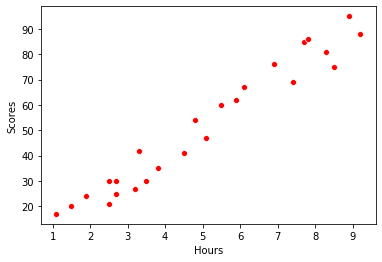

In [23]:
ax = sns.scatterplot(x="Hours", y="Scores",data=df,color='red')

## Preapraing the Data for Traning.

In [7]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

## splitting the data in train and test.

In [8]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Training the dataset

In [9]:
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Make predictions

In [17]:
# predicting the Score when hours = 9.25
reg.predict([[9.25]])

array([93.69173249])

In [14]:
y_pred = reg.predict(X_test)

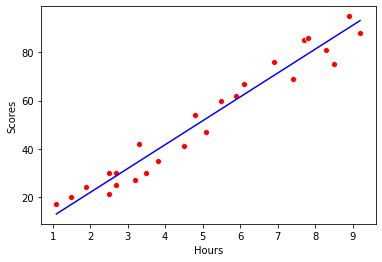

In [15]:
sns.scatterplot(df.Hours,df.Scores, color = 'red')
sns.lineplot(df.Hours,reg.predict(df[['Hours']]),color = 'blue')

In [16]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
reg.coef_

array([9.77580339])

In [20]:
reg.intercept_

2.48367340537321

### Evaluating the model

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
